In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore") 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_excel("Dados/dados_credito.xlsx")

## Análise Exploratória de Dados (EDA)

In [5]:
# visualizando o shape do dataframe
df.shape

(10476, 17)

In [6]:
# visualizando algumas das linhas
df.sample(10)

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
9761,9762,MG,42,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667
1924,1925,PR,42,Segundo Grau Completo,Casado,0,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
9332,9333,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
1529,1530,SC,23,Superior Completo,Casado,2,Não,3,700000,Não,0,75,Não,17500,1,50000,83.666667
8611,8612,PR,30,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3423,3424,RJ,53,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1839,1840,PR,42,Segundo Grau Completo,Casado,0,Não,0,0,Não,0,48,Sim,4500,2,28000,56.166667
6181,6182,PR,57,Superior Cursando,Casado,0,Não,0,0,Não,0,120,Não,9800,0,0,61.666667
3505,3506,PR,55,Superior Completo,Casado,2,Não,3,700000,Não,0,75,Não,17500,1,50000,83.666667
3991,3992,SP,62,Superior Cursando,Casado,0,Não,0,0,Não,0,120,Não,9800,0,0,61.666667


In [7]:
# visualizando algumas informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [8]:
# removendo a coluna CODIGO_CLIENTE
df.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [9]:
# verificando se existem valores nulos
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                2
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [10]:
# verificando os valores unicos da coluna ULTIMO_SALARIO
df.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [11]:
# identificando valores incorretos
df.loc[df['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [12]:
# substituindo valores incorretos por valores nulos
df.replace('SEM DADOS',np.nan, inplace = True)

In [13]:
# convertendo a coluna ULTIMO_SALARIO para float
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].astype(np.float64)

In [14]:
# Tratando valores nulos pela mediana
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].fillna((df['ULTIMO_SALARIO'].median()))

In [15]:
# verificando se existem valores nulos após as mudanças
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [16]:
# Verificando os valores únicos de cada coluna do DataFrame
unique_values = []
for i in df.columns[:17].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    unique_values.append(len(df[i].astype(str).value_counts()))

UF : 5
IDADE : 28
ESCOLARIDADE : 3
ESTADO_CIVIL : 4
QT_FILHOS : 6
CASA_PROPRIA : 2
QT_IMOVEIS : 4
VL_IMOVEIS : 10
OUTRA_RENDA : 2
OUTRA_RENDA_VALOR : 5
TEMPO_ULTIMO_EMPREGO_MESES : 17
TRABALHANDO_ATUALMENTE : 2
ULTIMO_SALARIO : 17
QT_CARROS : 3
VALOR_TABELA_CARROS : 11
SCORE : 17


In [17]:
df.groupby(['QT_FILHOS']).size()

QT_FILHOS
0     3329
1     3726
2     2303
3     1116
38       1
42       1
dtype: int64

In [18]:
# visualizando as estatísticas do dataframe
df.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [19]:
# identificando as variáveis numéricas para identificação de outliers
var_num = []
for i in df.columns[:16].tolist():
        if df.dtypes[i] in ['int64', 'float64']:            
                print(i, ':' , df.dtypes[i]) 
                var_num.append(i)


IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [20]:
# Identificando possíveis outliers explícitos
print('Maior Idade: ', df['IDADE'].max())
print('Menor Idade: ', df['IDADE'].min())
print('----------------------------------------------------')
print('Maior qtd de filhos:', df['QT_FILHOS'].max())
print('Menor qtd de filhos:', df['QT_FILHOS'].min())
print('----------------------------------------------------')
print('Maior qtd de imóveis:', df['QT_IMOVEIS'].max())
print('Menor qtd de imóveis:', df['QT_IMOVEIS'].min())
print('----------------------------------------------------')
print('Maior valor dos imóveis: ', df['VL_IMOVEIS'].max())
print('Menor valor dos imóveis: ', df['VL_IMOVEIS'].min())
print('----------------------------------------------------')
print('Maior renda extra: ', df['OUTRA_RENDA_VALOR'].max())
print('Menor renda extra: ', df['OUTRA_RENDA_VALOR'].min())
print('----------------------------------------------------')
print('Maior qtd de meses no último emprego: ', df['TEMPO_ULTIMO_EMPREGO_MESES'].max())
print('Menor qtd de meses no último emprego: ', df['TEMPO_ULTIMO_EMPREGO_MESES'].min())
print('----------------------------------------------------')
print('Maior último salário: ', df['ULTIMO_SALARIO'].max())
print('Menor último salário: ', df['ULTIMO_SALARIO'].min())
print('----------------------------------------------------')
print('Maior valor dos carros: ', df['VALOR_TABELA_CARROS'].max())
print('Menor valor dos carros: ', df['VALOR_TABELA_CARROS'].min())
print('----------------------------------------------------')

Maior Idade:  65
Menor Idade:  19
----------------------------------------------------
Maior qtd de filhos: 42
Menor qtd de filhos: 0
----------------------------------------------------
Maior qtd de imóveis: 3
Menor qtd de imóveis: 0
----------------------------------------------------
Maior valor dos imóveis:  900000
Menor valor dos imóveis:  0
----------------------------------------------------
Maior renda extra:  4000
Menor renda extra:  0
----------------------------------------------------
Maior qtd de meses no último emprego:  150
Menor qtd de meses no último emprego:  8
----------------------------------------------------
Maior último salário:  22000.0
Menor último salário:  1800.0
----------------------------------------------------
Maior valor dos carros:  180000
Menor valor dos carros:  0
----------------------------------------------------


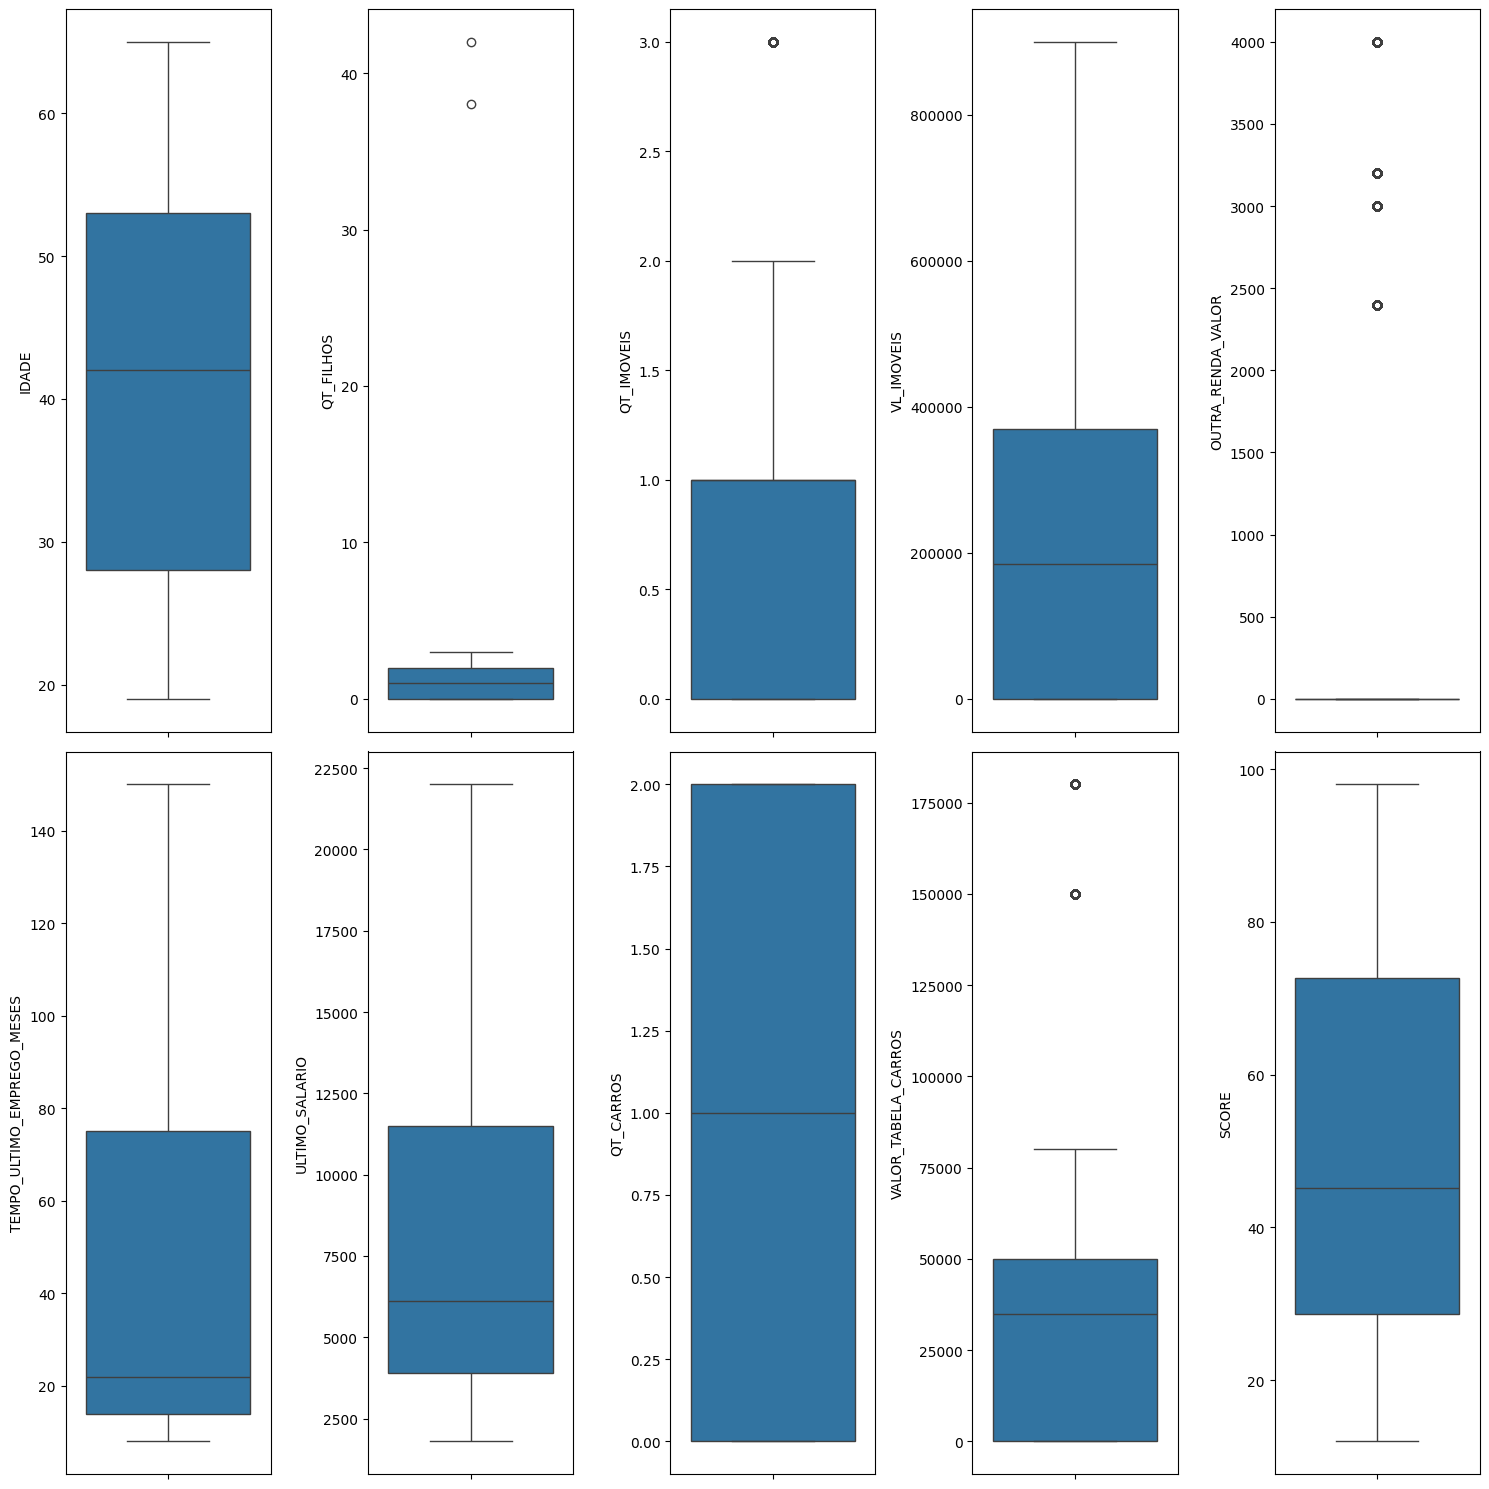

In [21]:
# Configuração básica de exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 15.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 5)

linha = 0
coluna = 0

# gerando todos os boxplots de uma só vez
for i in var_num:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

In [22]:
# Pelo boxplot, identificamos que as variáveis 'QT_FILHOS', 'QT_IMOVEIS', 'VL_IMOVEIS', 'OUTRA_RENDA_VALOR' podem possuir valores outliers
df.loc[df['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [23]:
# removendo os valores outliers em QT_FILHOS
df.drop(df.loc[df['QT_FILHOS'] > 4].index, inplace=True)

In [24]:
# Verificando a variável 'QT_IMOVEIS'
df.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

In [25]:
# Verificando a variável 'VL_IMOVEIS'
df.groupby(['VL_IMOVEIS']).size()

VL_IMOVEIS
0         4680
185000     612
220000     791
280000     522
340000     522
370000     792
450000     990
600000     521
700000     522
900000     522
dtype: int64

In [26]:
# Verificando a variável 'OUTRA_RENDA'
df.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [27]:
df.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

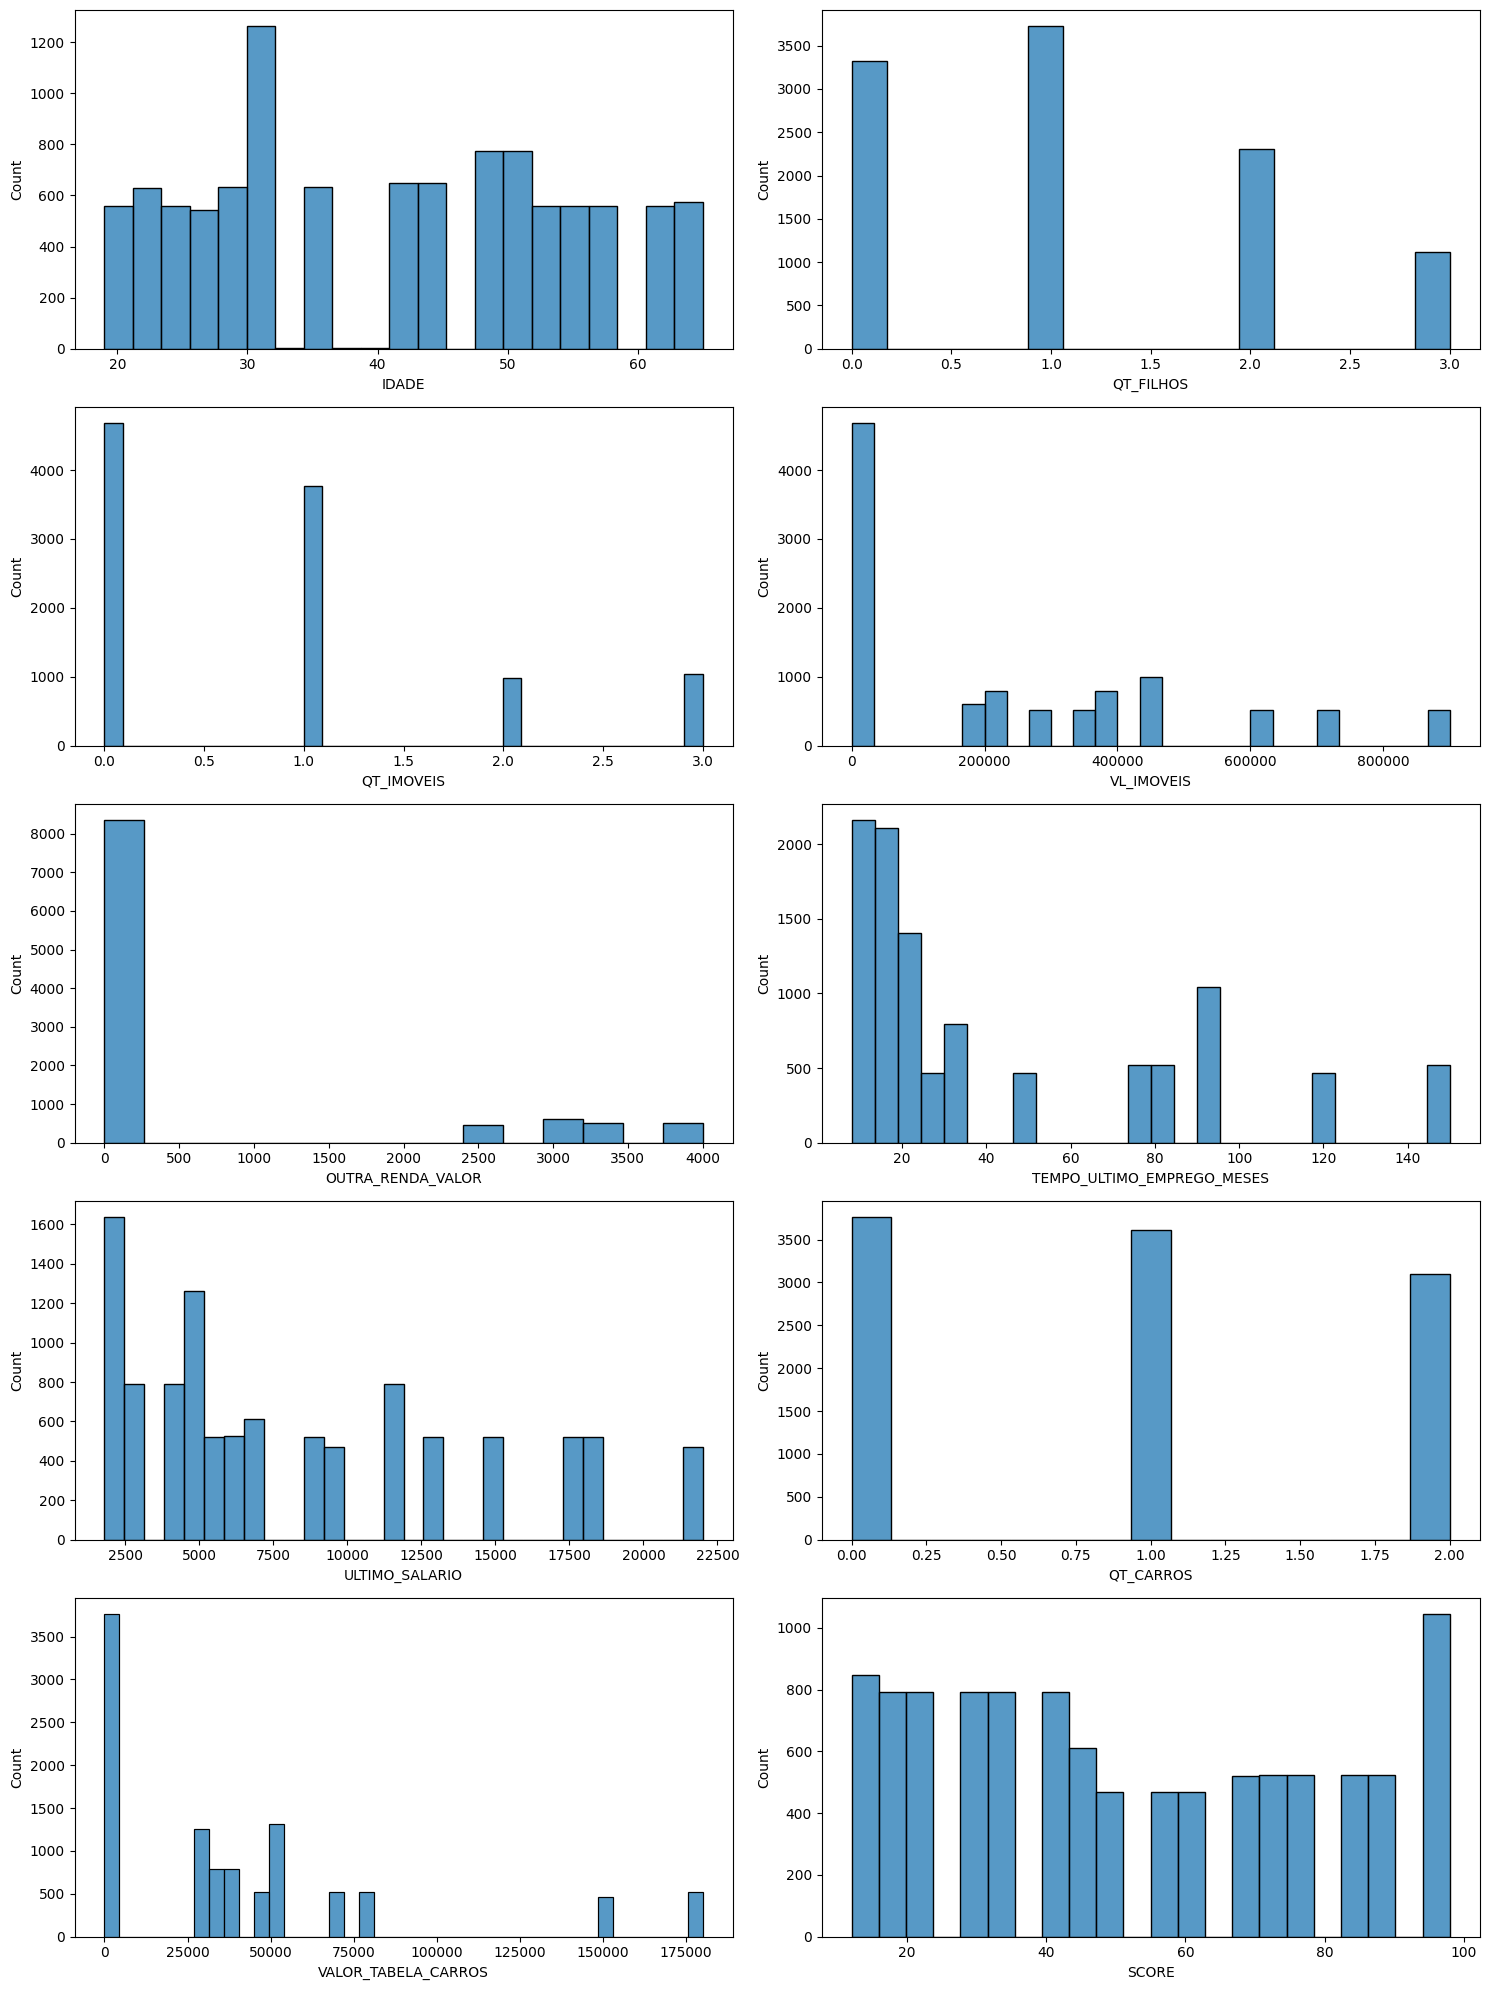

In [28]:
# Configuração básica de exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 20.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(5, 2)

linha = 0
coluna = 0

for i in var_num:
    sns.histplot(data = df, x=i, ax=axes[linha][coluna])    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  object 
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  object 
 3   ESTADO_CIVIL                10474 non-null  object 
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  object 
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  object 
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  object 
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

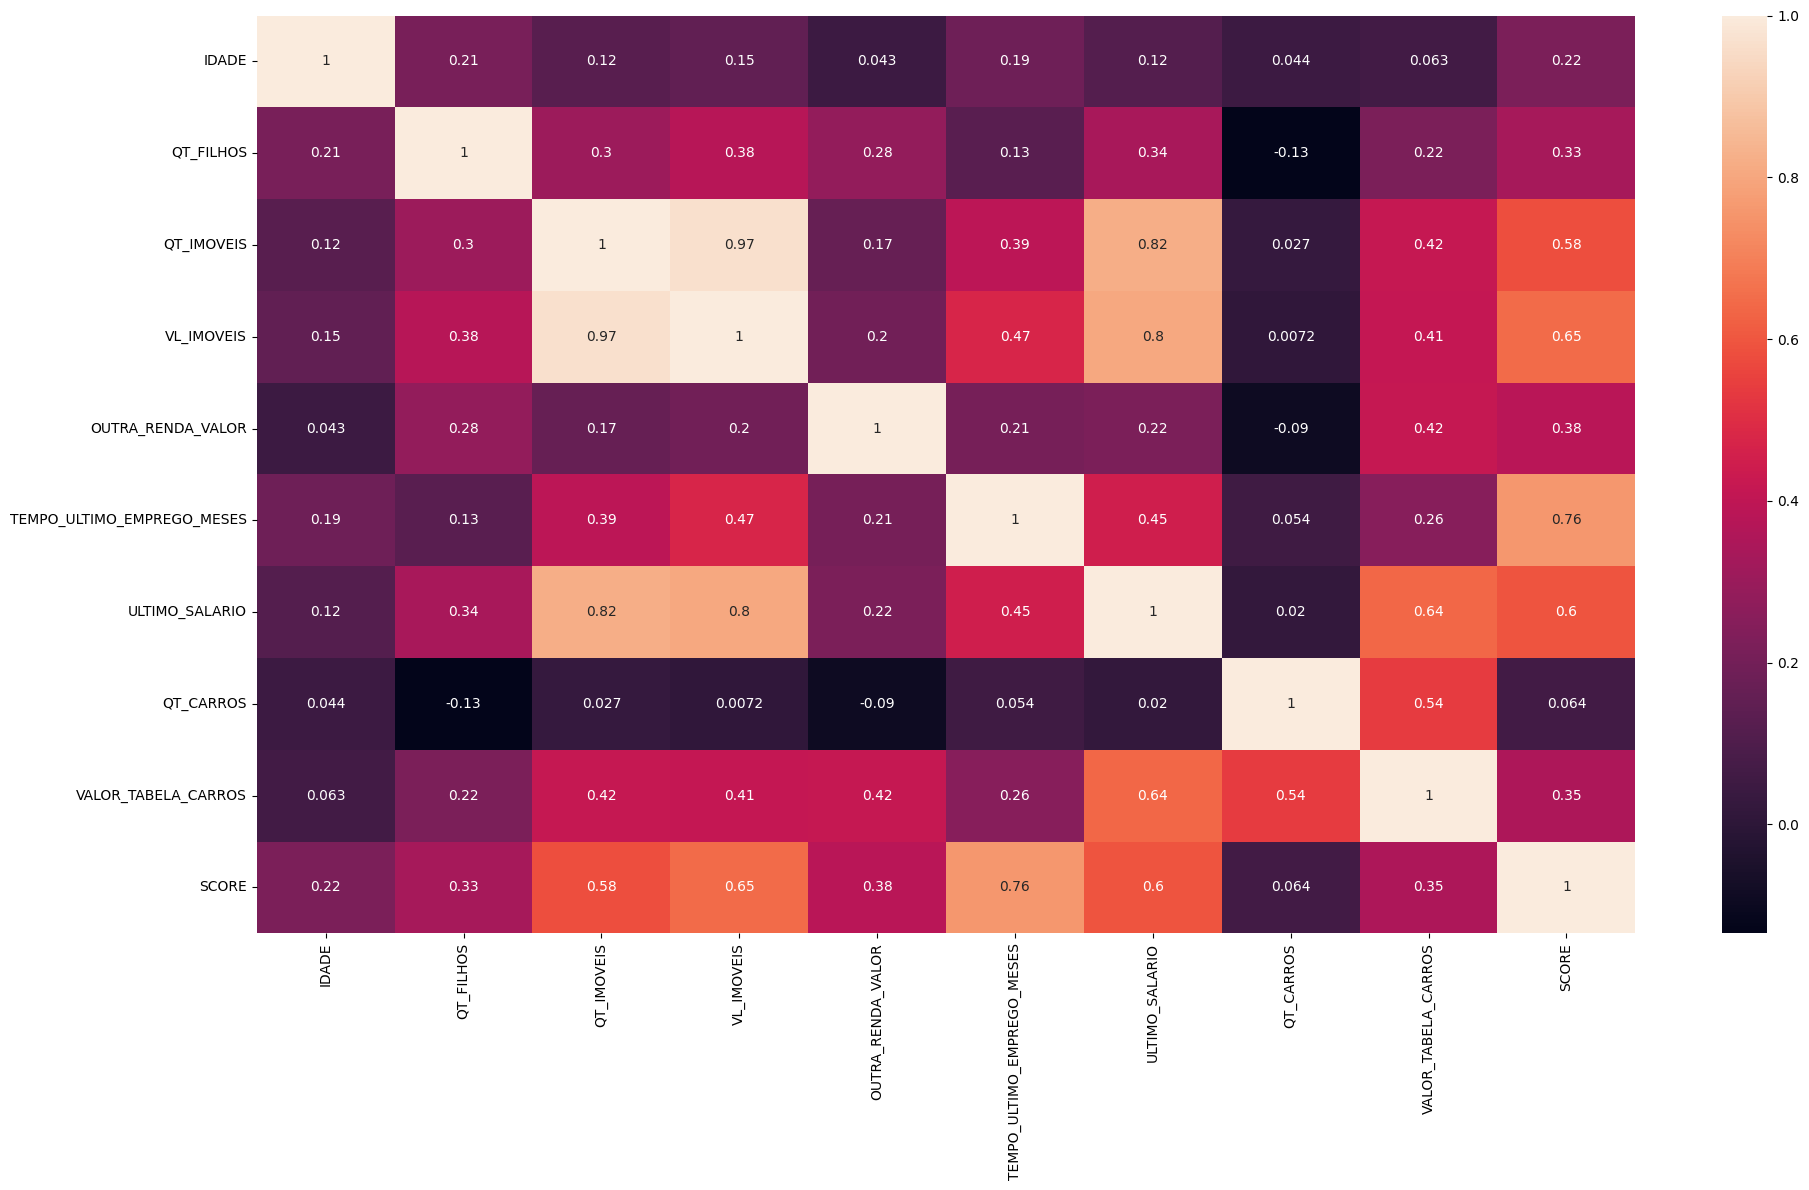

In [30]:
# Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include='number')

# Calculando a matriz de correlação
corr_matrix = df_num.corr()

plt.rcParams["figure.figsize"] = (20,12)
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

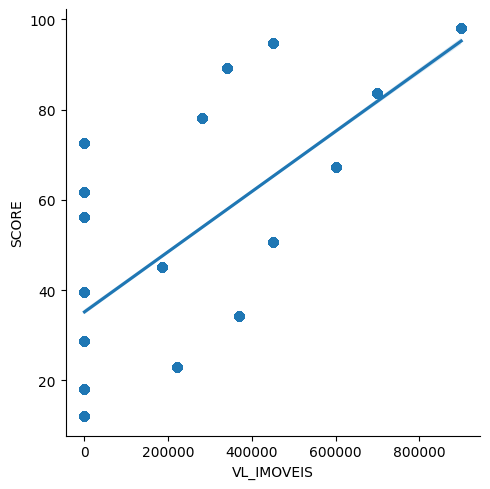

In [31]:
# Visualizando a relação entre as variáveis 'VL_IMOVEIS' e 'SCORE'
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = df);

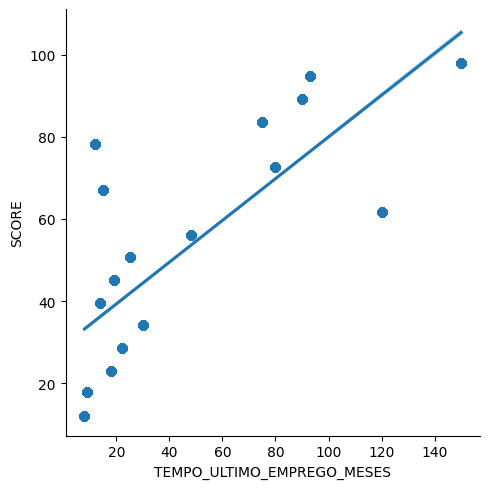

In [32]:
# Visualizando a correlação entre as variáveis 'TEMPO_ULTIMO_EMPREGO_MESES' e 'SCORE'
sns.lmplot(x = "TEMPO_ULTIMO_EMPREGO_MESES", y = "SCORE", data = df);

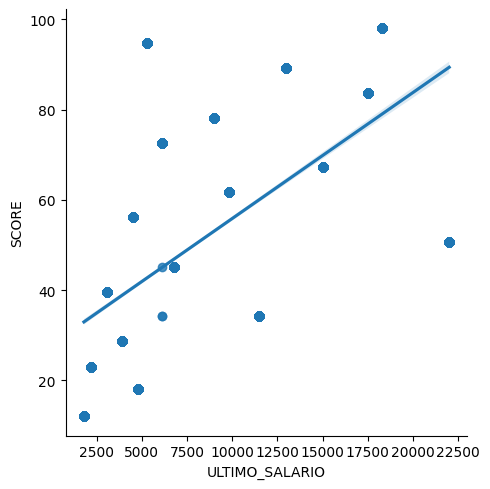

In [33]:
# Visualizando a correlação entre as variáveis 'ULTIMO_SALARIO' e 'SCORE'
sns.lmplot(x = "ULTIMO_SALARIO", y = "SCORE", data = df);

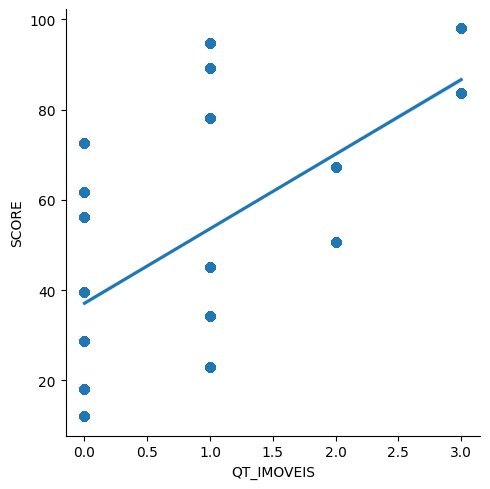

In [34]:
# Visualizando a relação entre as variáveis 'QT_IMOVEIS' e 'SCORE'
sns.lmplot(x = "QT_IMOVEIS", y = "SCORE", data = df);

### Engenharia de atributos

In [35]:
print('Menor Idade: ', df['IDADE'].min())
print('Maior Idade: ', df['IDADE'].max())

Menor Idade:  19
Maior Idade:  65


Criando algumas variáveis categóricas para testar e ver se performam melhor na matriz de correlação.

In [36]:
# Criando faixa etaria
idade_bins = [0, 30, 40, 50, 60, 70]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "51 a 60", "Maior que 60"]

df["FAIXA_ETARIA"] = pd.cut(df["IDADE"], idade_bins, labels=idade_categoria)

df["FAIXA_ETARIA"].value_counts()

FAIXA_ETARIA
Até 30          3552
51 a 60         2448
41 a 50         2070
31 a 40         1270
Maior que 60    1134
Name: count, dtype: int64

In [37]:
df.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800.0     846
2200.0     791
3100.0     792
3900.0     792
4500.0     468
4800.0     792
5300.0     522
6100.0     525
6800.0     611
9000.0     522
9800.0     468
11500.0    790
13000.0    522
15000.0    521
17500.0    522
18300.0    522
22000.0    468
dtype: int64

In [38]:
# Criando faixas salariais
bins = [-1, 4000, 8000, 12000, 16000, 20000, 100000]
labels = ['Até 4k', 'De 4k até 8k', 'De 8k até 12k', 'De 12k até 16k', 'De 16k até 20k', 'Acima de 20k']
df['FAIXA_ULTIMO_SALARIO'] = pd.cut(df['ULTIMO_SALARIO'], bins=bins, labels=labels)
df.groupby(['FAIXA_ULTIMO_SALARIO']).size()

FAIXA_ULTIMO_SALARIO
Até 4k            3221
De 4k até 8k      2918
De 8k até 12k     1780
De 12k até 16k    1043
De 16k até 20k    1044
Acima de 20k       468
dtype: int64

In [39]:
df.groupby(['VL_IMOVEIS']).size()

VL_IMOVEIS
0         4680
185000     612
220000     791
280000     522
340000     522
370000     792
450000     990
600000     521
700000     522
900000     522
dtype: int64

In [40]:
df.groupby(['TEMPO_ULTIMO_EMPREGO_MESES']).size()

TEMPO_ULTIMO_EMPREGO_MESES
8      846
9      792
12     522
14     792
15     521
18     791
19     612
22     792
25     468
30     792
48     468
75     522
80     522
90     522
93     522
120    468
150    522
dtype: int64

In [41]:
# Criando faixas de tempo de emprego
bins = [0, 12, 24, 36, 60, 90, 120, 200]
labels = ['Até 12', 'De 12 até 24', 'De 24 até 36', 'De 36 até 60', 'De 60 até 90', 'De 90 até 120', 'Acima de 120']
df['FAIXA_TEMPO_ULTIMO_EMPREGO_MESES'] = pd.cut(df['TEMPO_ULTIMO_EMPREGO_MESES'], bins=bins, labels=labels)
df.groupby(['FAIXA_TEMPO_ULTIMO_EMPREGO_MESES']).size()

FAIXA_TEMPO_ULTIMO_EMPREGO_MESES
Até 12           2160
De 12 até 24     3508
De 24 até 36     1260
De 36 até 60      468
De 60 até 90     1566
De 90 até 120     990
Acima de 120      522
dtype: int64

In [42]:
var_cat = []
for i in df.columns[:48].tolist():
    if df.dtypes[i] in ['object', 'category']:            
        print(i, ':' , df.dtypes[i]) 
        var_cat.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category
FAIXA_ULTIMO_SALARIO : category
FAIXA_TEMPO_ULTIMO_EMPREGO_MESES : category


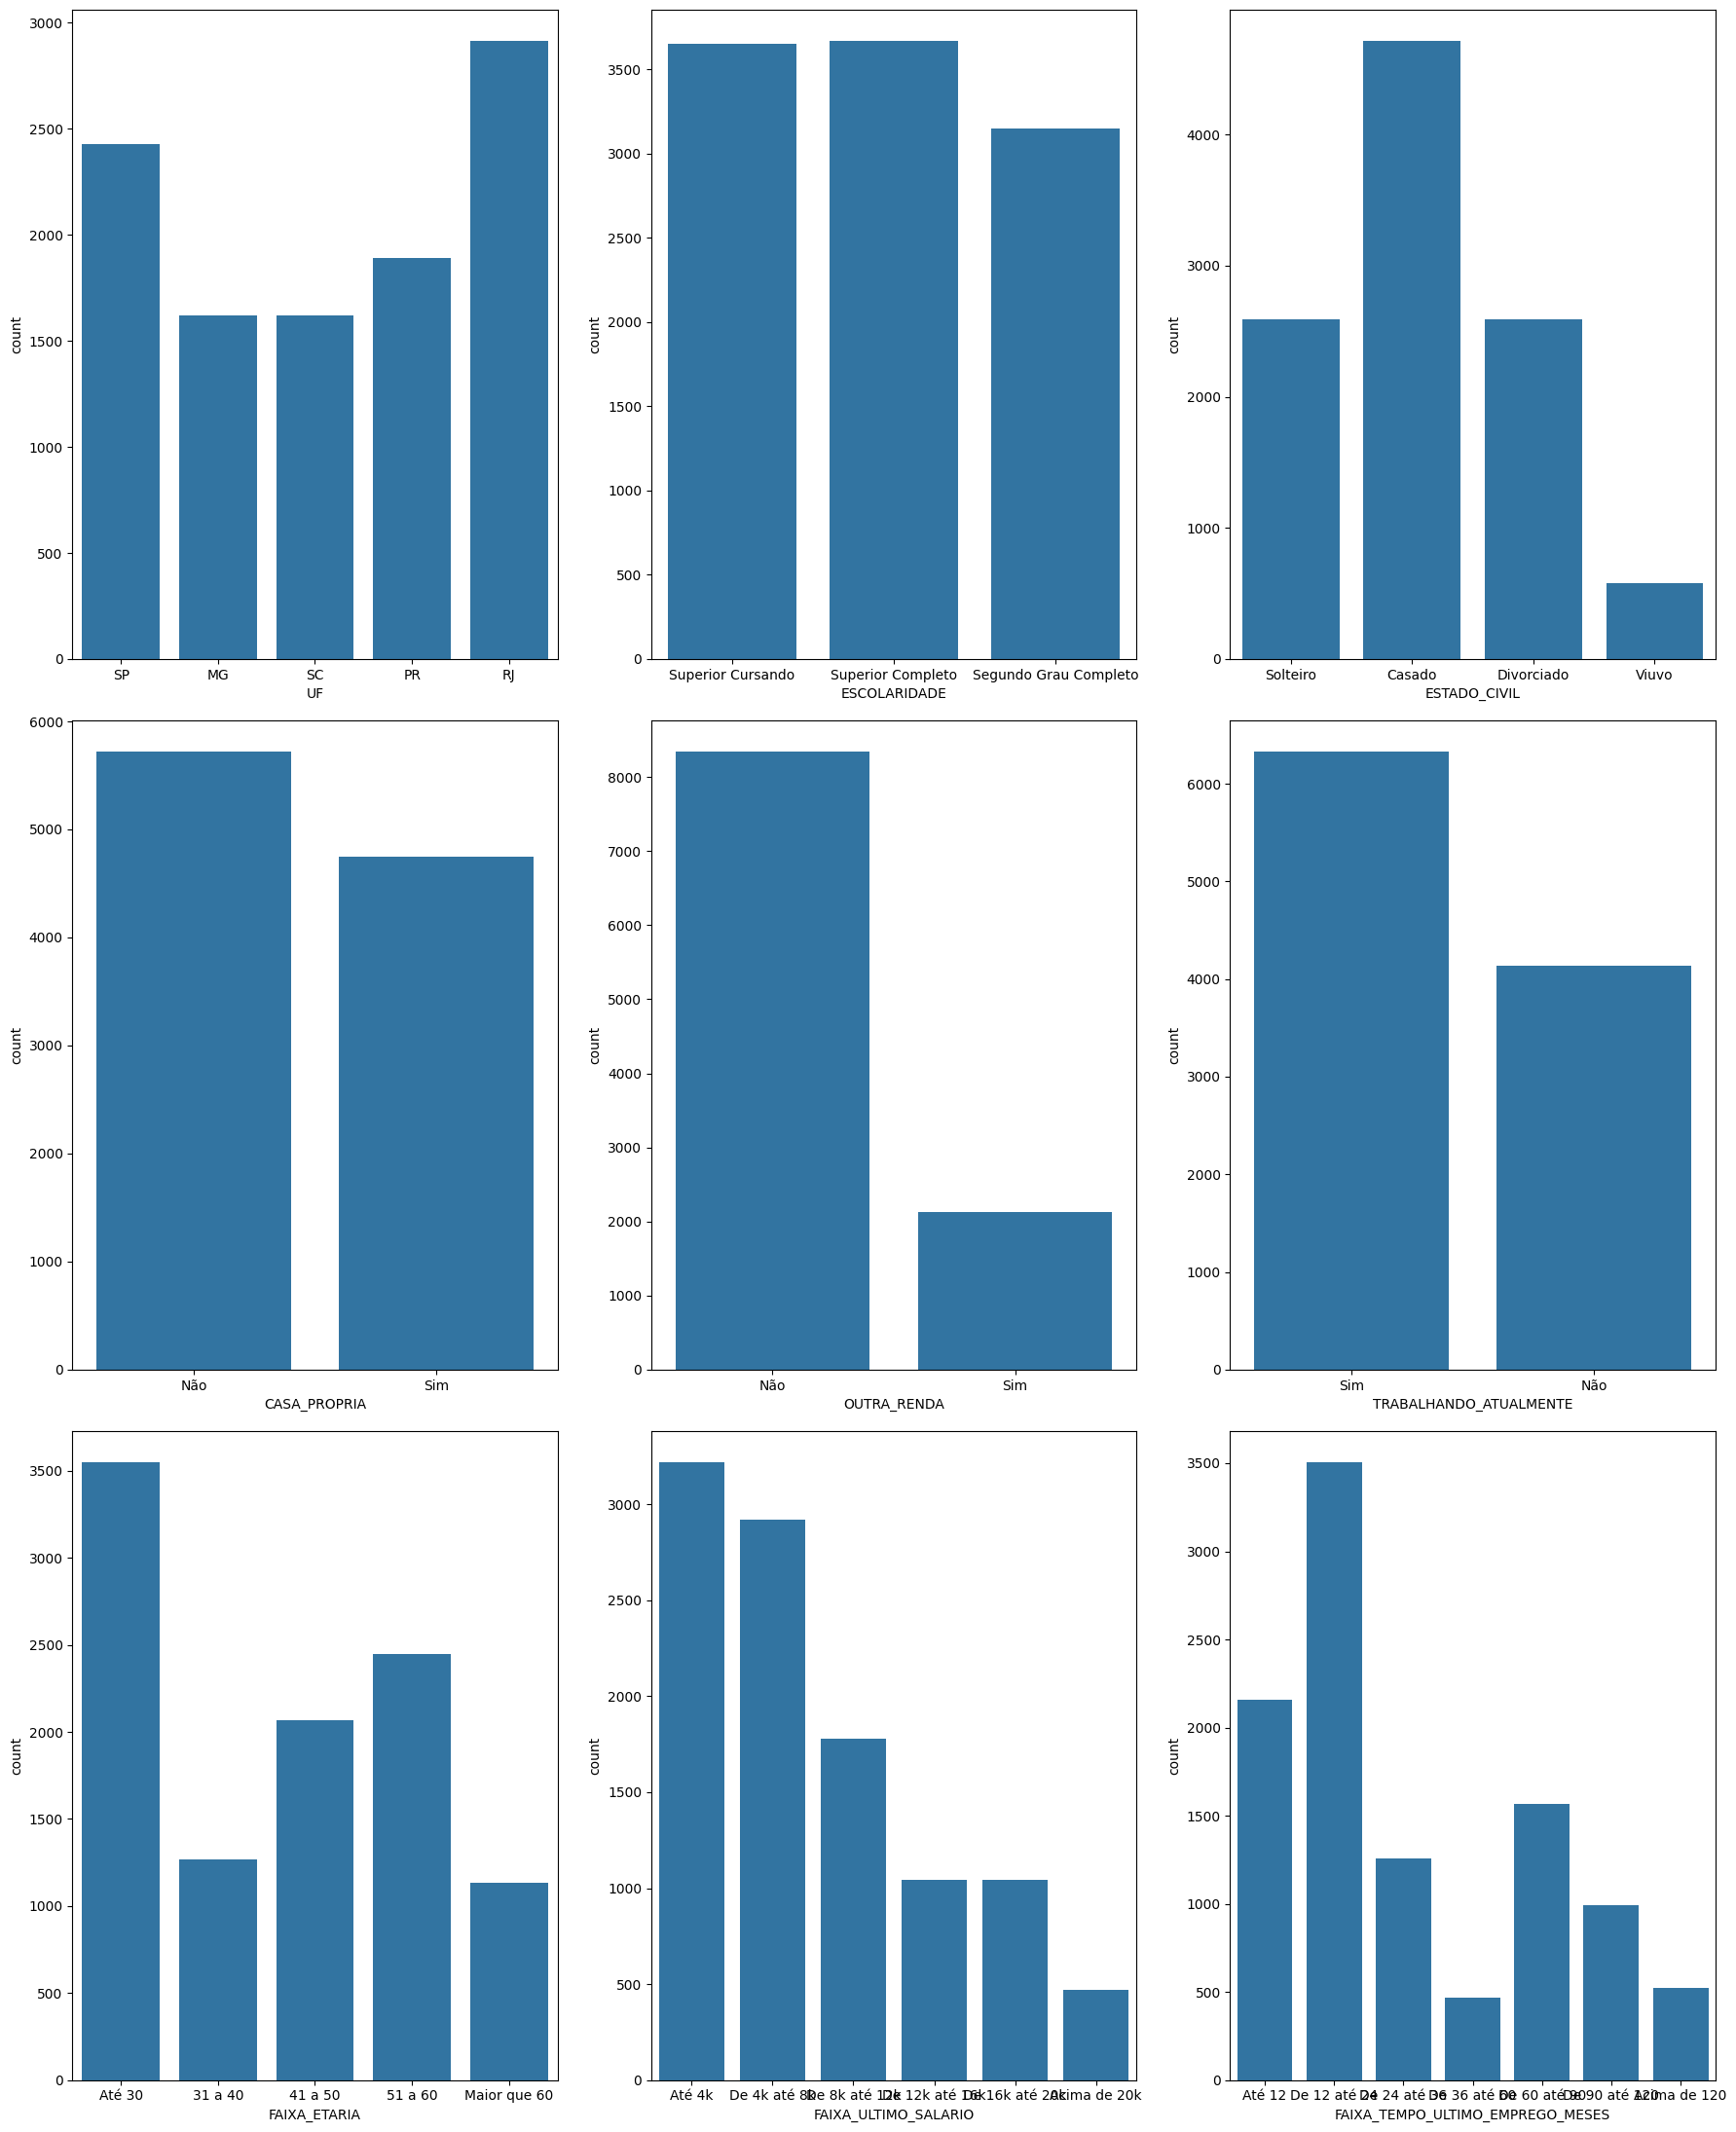

In [43]:

# Configuração básica de exibição dos gráficos
plt.rcParams["figure.figsize"] = [18.00, 22.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 3)

linha = 0
coluna = 0

for i in var_cat:    
    sns.countplot(data = df, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   UF                                10474 non-null  object  
 1   IDADE                             10474 non-null  int64   
 2   ESCOLARIDADE                      10474 non-null  object  
 3   ESTADO_CIVIL                      10474 non-null  object  
 4   QT_FILHOS                         10474 non-null  int64   
 5   CASA_PROPRIA                      10474 non-null  object  
 6   QT_IMOVEIS                        10474 non-null  int64   
 7   VL_IMOVEIS                        10474 non-null  int64   
 8   OUTRA_RENDA                       10474 non-null  object  
 9   OUTRA_RENDA_VALOR                 10474 non-null  int64   
 10  TEMPO_ULTIMO_EMPREGO_MESES        10474 non-null  int64   
 11  TRABALHANDO_ATUALMENTE            10474 non-null  object  


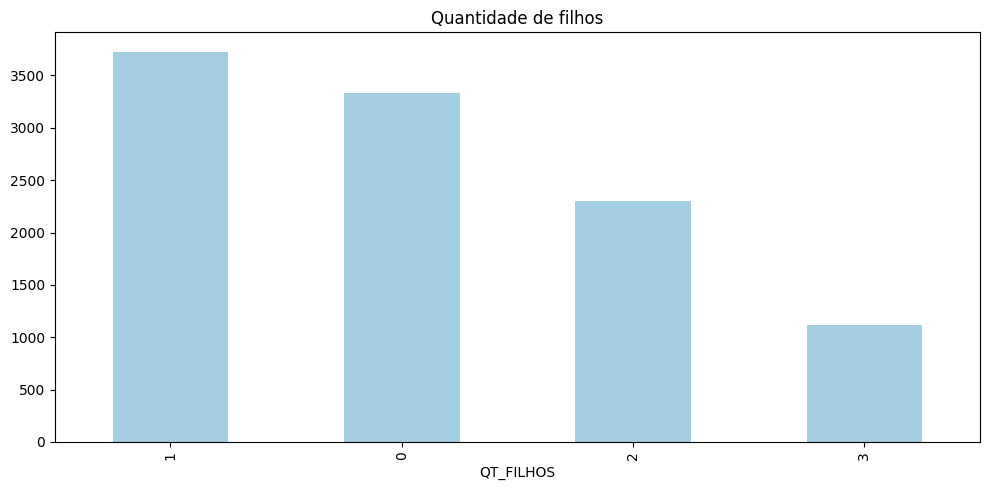

In [45]:
df.QT_FILHOS.value_counts().plot(kind='bar', title='Quantidade de filhos', figsize=(10, 5), colormap='Paired');

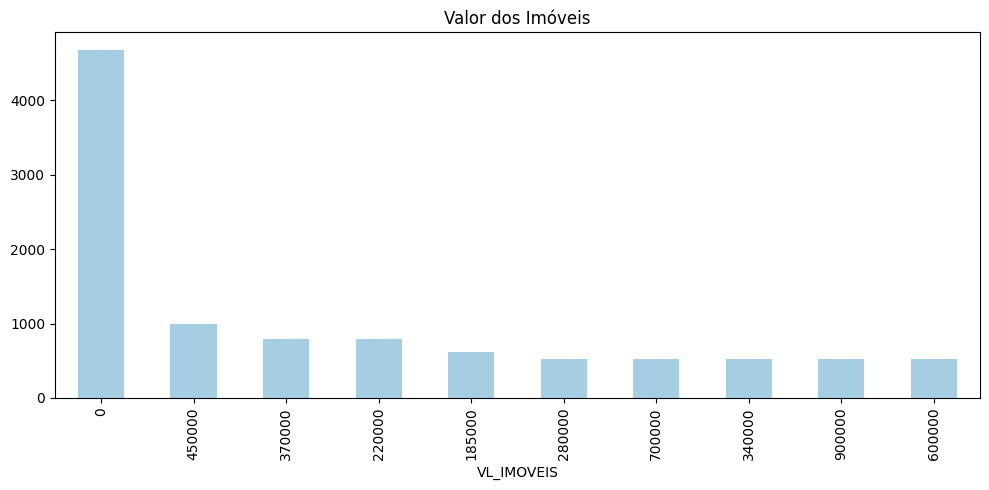

In [46]:
df.VL_IMOVEIS.value_counts().plot(kind='bar', title='Valor dos Imóveis', figsize=(10, 5), colormap='Paired');

## Separando os dados mais relevantes para o modelo

In [47]:
df.columns

Index(['UF', 'IDADE', 'ESCOLARIDADE', 'ESTADO_CIVIL', 'QT_FILHOS',
       'CASA_PROPRIA', 'QT_IMOVEIS', 'VL_IMOVEIS', 'OUTRA_RENDA',
       'OUTRA_RENDA_VALOR', 'TEMPO_ULTIMO_EMPREGO_MESES',
       'TRABALHANDO_ATUALMENTE', 'ULTIMO_SALARIO', 'QT_CARROS',
       'VALOR_TABELA_CARROS', 'SCORE', 'FAIXA_ETARIA', 'FAIXA_ULTIMO_SALARIO',
       'FAIXA_TEMPO_ULTIMO_EMPREGO_MESES'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   UF                                10474 non-null  object  
 1   IDADE                             10474 non-null  int64   
 2   ESCOLARIDADE                      10474 non-null  object  
 3   ESTADO_CIVIL                      10474 non-null  object  
 4   QT_FILHOS                         10474 non-null  int64   
 5   CASA_PROPRIA                      10474 non-null  object  
 6   QT_IMOVEIS                        10474 non-null  int64   
 7   VL_IMOVEIS                        10474 non-null  int64   
 8   OUTRA_RENDA                       10474 non-null  object  
 9   OUTRA_RENDA_VALOR                 10474 non-null  int64   
 10  TEMPO_ULTIMO_EMPREGO_MESES        10474 non-null  int64   
 11  TRABALHANDO_ATUALMENTE            10474 non-null  object  


* OneHotEncoding (adequação de tipos)

In [49]:
var_cat2 = []
for i in df.columns[:20].tolist():
        if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':                        
            var_cat2.append(i)

print('Número de variáveis categoricas: ', len(var_cat2))

var_cat2

Número de variáveis categoricas:  9


['UF',
 'ESCOLARIDADE',
 'ESTADO_CIVIL',
 'CASA_PROPRIA',
 'OUTRA_RENDA',
 'TRABALHANDO_ATUALMENTE',
 'FAIXA_ETARIA',
 'FAIXA_ULTIMO_SALARIO',
 'FAIXA_TEMPO_ULTIMO_EMPREGO_MESES']

In [50]:
# aplicação do OneHotEncoder
for i in var_cat:
    df[i] = LabelEncoder().fit_transform(df[i])

In [51]:
df.isnull().sum()

UF                                  0
IDADE                               0
ESCOLARIDADE                        0
ESTADO_CIVIL                        0
QT_FILHOS                           0
CASA_PROPRIA                        0
QT_IMOVEIS                          0
VL_IMOVEIS                          0
OUTRA_RENDA                         0
OUTRA_RENDA_VALOR                   0
TEMPO_ULTIMO_EMPREGO_MESES          0
TRABALHANDO_ATUALMENTE              0
ULTIMO_SALARIO                      0
QT_CARROS                           0
VALOR_TABELA_CARROS                 0
SCORE                               0
FAIXA_ETARIA                        0
FAIXA_ULTIMO_SALARIO                0
FAIXA_TEMPO_ULTIMO_EMPREGO_MESES    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   UF                                10474 non-null  int64  
 1   IDADE                             10474 non-null  int64  
 2   ESCOLARIDADE                      10474 non-null  int64  
 3   ESTADO_CIVIL                      10474 non-null  int64  
 4   QT_FILHOS                         10474 non-null  int64  
 5   CASA_PROPRIA                      10474 non-null  int64  
 6   QT_IMOVEIS                        10474 non-null  int64  
 7   VL_IMOVEIS                        10474 non-null  int64  
 8   OUTRA_RENDA                       10474 non-null  int64  
 9   OUTRA_RENDA_VALOR                 10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES        10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE            10474 non-null  int64  
 12  ULTIMO_SA

In [57]:
df.sample(10)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA,FAIXA_ULTIMO_SALARIO,FAIXA_TEMPO_ULTIMO_EMPREGO_MESES
6281,0,27,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,3,1,1
8188,0,32,2,2,1,1,1,185000,1,3000,19,1,6800.0,0,0,45.166667,0,4,2
8335,4,19,2,2,0,1,0,0,0,0,22,0,3900.0,0,0,28.666667,3,1,2
2116,3,32,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,0,4,1
3510,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,3,4,1
8588,2,65,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,4,1,2
5328,4,30,0,1,0,0,0,0,0,0,14,1,3100.0,2,40000,39.666667,3,1,2
854,2,25,1,0,2,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,3,1,2
5113,2,65,1,0,2,0,3,700000,0,0,75,0,17500.0,1,50000,83.666667,4,3,5
1934,0,23,1,2,1,0,1,370000,0,0,30,1,11500.0,1,35000,34.166667,3,5,3


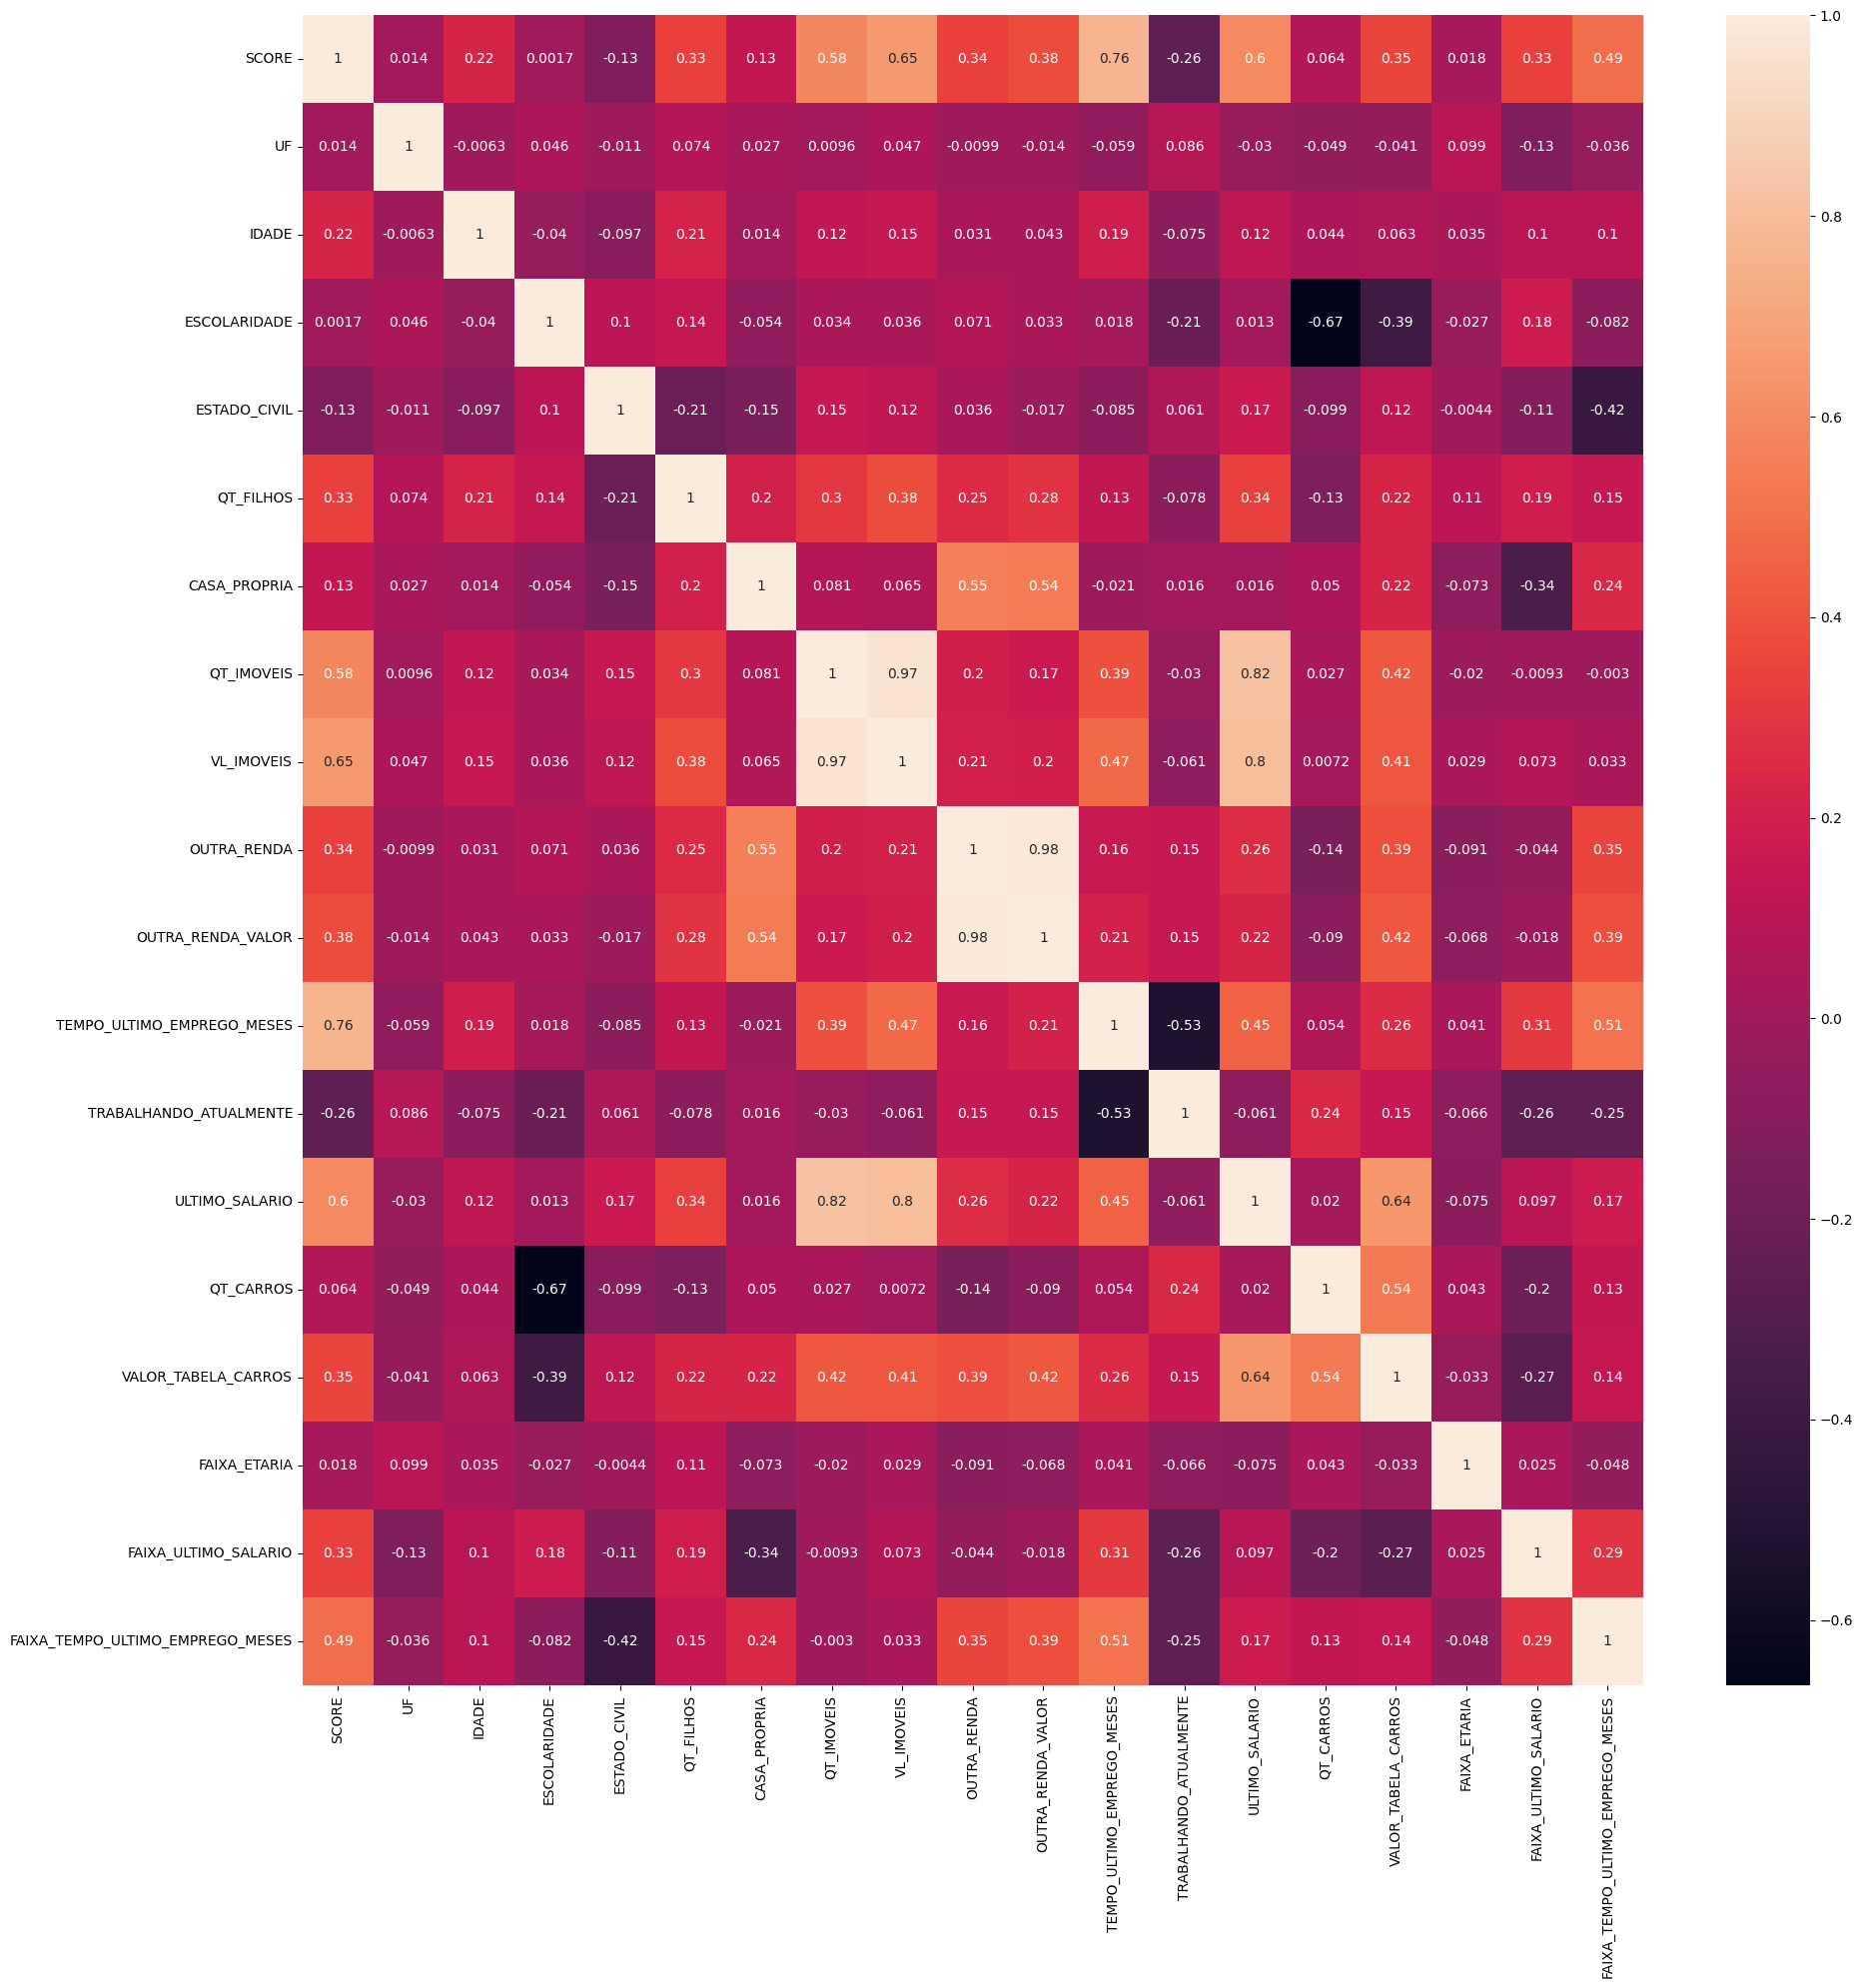

In [53]:
# Reordenar as colunas da matriz de correlação
columns_order = ['SCORE'] + [col for col in df.columns if col != 'SCORE']
corr_matrix_reordered = df[columns_order].corr()

# Plotar o heatmap
plt.rcParams["figure.figsize"] = (20, 20)
ax = sns.heatmap(corr_matrix_reordered, annot=True)
plt.show()

In [64]:
# Definir um limiar de correlação
limiar_corr = 0.35

# Filtra colunas com correlação maior ou igual ao limiar em relação a 'SCORE'
colunas_relevantes = corr_matrix_reordered.loc['SCORE'][abs(corr_matrix_reordered.loc['SCORE']) >= limiar_corr].index

# Criar um novo DataFrame apenas com as colunas mais relevantes
df_relevante = df[colunas_relevantes]

In [65]:
# Visualizar as 10 primeiras linhas do novo DataFrame
df_relevante.sample(10)

,SCORE,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,VALOR_TABELA_CARROS,FAIXA_TEMPO_ULTIMO_EMPREGO_MESES
1504,45.166667,1,185000,3000,19,6800.0,0,2
10057,28.666667,0,0,0,22,3900.0,0,2
5259,34.166667,1,370000,0,30,11500.0,35000,3
4226,98.000000,3,900000,0,150,18300.0,80000,0
9020,78.166667,1,280000,0,12,9000.0,0,1
316,89.166667,1,340000,4000,90,13000.0,180000,5
3423,12.000000,0,0,0,8,1800.0,0,1
5184,94.666667,1,450000,3200,93,5300.0,0,6
2465,18.000000,0,0,0,9,4800.0,50000,1
4303,34.166667,1,370000,0,30,11500.0,35000,3


In [66]:
# Removendo a coluna FAIXA_TEMPO_ULTIMO_EMPREGO_MESES pois esta se tornou redundante
# em relação a TEMPO_ULTIMO_EMPREGO_MESES que é mais relevante em relação a SCORE
df_relevante.drop('FAIXA_TEMPO_ULTIMO_EMPREGO_MESES', axis=1, inplace=True)

In [67]:
df_relevante.sample(5)

,SCORE,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,VALOR_TABELA_CARROS
5226,72.666667,0,0,0,80,6100.0,48000
1942,78.166667,1,280000,0,12,9000.0,0
6886,12.000000,0,0,0,8,1800.0,0
4364,78.166667,1,280000,0,12,9000.0,0
5083,45.166667,1,185000,3000,19,6800.0,0


In [68]:
df_relevante.isnull().sum()

SCORE                         0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
ULTIMO_SALARIO                0
VALOR_TABELA_CARROS           0
dtype: int64

Preparando o modelo

In [69]:
# Separando a variavel alvo
target = df_relevante.iloc[:,0]

In [71]:
target.head()

0    12.000000
1    18.000000
2    23.000000
3    28.666667
4    34.166667
Name: SCORE, dtype: float64

In [72]:
# Separando os atributos preditores
predictors = df_relevante.iloc[:,1:]
predictors.head()

,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,VALOR_TABELA_CARROS
0,0,0,0,8,1800.0,0
1,0,0,0,9,4800.0,50000
2,1,220000,0,18,2200.0,30000
3,0,0,0,22,3900.0,0
4,1,370000,0,30,6100.0,35000


In [73]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(predictors, target, test_size = 0.3, random_state = 40)

In [74]:
# Normalização
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

## Criação, Avaliação e Teste do Modelo

In [76]:
# Instanciar o StandardScaler
scaler = StandardScaler()

# Ajustar e transformar os dados de treino
X_treino_normalizados = scaler.fit_transform(X_treino)

# Instanciar o modelo de regressão linear
modelo = LinearRegression(fit_intercept=True)

# Treinar o modelo com os dados normalizados
modelo.fit(X_treino_normalizados, y_treino)

LinearRegression()

In [77]:
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.3031101484841182

In [79]:
mae = mean_absolute_error(y_teste, modelo.predict(X_teste_normalizados))
mae

20.426584637244353

In [80]:
mse = mean_squared_error(y_teste, modelo.predict(X_teste_normalizados))
mse

519.6339828679319

In [82]:
rmse = np.sqrt(mse)
rmse

22.795481632725636

In [85]:
QT_IMOVEIS = 1
VL_IMOVEIS = 300000
OUTRA_RENDA_VALOR = 2000 
TEMPO_ULTIMO_EMPREGO_MESES = 18 
ULTIMO_SALARIO = 5400.0
VALOR_TABELA_CARROS = 70000

novos_dados = [QT_IMOVEIS, VL_IMOVEIS, OUTRA_RENDA_VALOR,
       TEMPO_ULTIMO_EMPREGO_MESES, ULTIMO_SALARIO, VALOR_TABELA_CARROS]

In [86]:
# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)
# Previsão
print("Score de crédito previsto para esse cliente:", modelo.predict(X))

Score de crédito previsto para esse cliente: [57.0379694]
